<a href="https://colab.research.google.com/github/SebastianRosenquist/Emotion_prediction_of_UkraineRussian_Conflict/blob/master/GoEmotion_HugginFace_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow

In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.1 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")

model = AutoModelForSequenceClassification.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")

In [ ]:
LABELS = [
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]

# Model training parameters.
CONFIG = {
    'name': 'models.prado',
    'batch_size': 1024,
    'train_steps': 10000,
    'learning_rate': 0.0006,
    'learning_rate_decay_steps': 340,
    'learning_rate_decay_rate': 0.7,
}

# Limits the amount of logging output produced by the training run, in order to
# avoid browser slowdowns.
CONFIG['save_checkpoints_steps'] = int(CONFIG['train_steps'] / 10)

MODEL_CONFIG = {
    'labels': LABELS,
    'multilabel': True,
    'quantize': False,
    'max_seq_len': 128,
    'max_seq_len_inference': 128,
    'exclude_nonalphaspace_unicodes': False,
    'split_on_space': True,
    'embedding_regularizer_scale': 0.035,
    'embedding_size': 64,
    'bigram_channels': 64,
    'trigram_channels': 64,
    'feature_size': 512,
    'network_regularizer_scale': 0.0001,
    'keep_prob': 0.5,
    'word_novelty_bits': 0,
    'doc_size_levels': 0,
    'add_bos_tag': False,
    'add_eos_tag': False,
    'pre_logits_fc_layers': [],
    'text_distortion_probability': 0.0,
}

CONFIG['model_config'] = MODEL_CONFIG

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# train-test split
from sklearn.model_selection import train_test_split

# loss functions for today
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# stuff for evaluating classifiers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # for displaying a pretty confusion matrix


# dummy models for comparison
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Importing the different dataset and merging them
url1 = 'https://raw.githubusercontent.com/SebastianRosenquist/Emotion_prediction_of_UkraineRussian_Conflict/master/Datasets/controversial_posts.csv'
df1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/SebastianRosenquist/Emotion_prediction_of_UkraineRussian_Conflict/master/Datasets/hot_posts.csv'
df2 = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/SebastianRosenquist/Emotion_prediction_of_UkraineRussian_Conflict/master/Datasets/new_posts.csv'
df3 = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/SebastianRosenquist/Emotion_prediction_of_UkraineRussian_Conflict/master/Datasets/top_posts.csv'
df4 = pd.read_csv(url4)

dfMerge = [df1, df2, df3, df4]
#Drop rows with missing values
df = pd.concat(dfMerge)
df.dropna(subset=['score'], inplace=True)
df.dropna(subset=['title'], inplace=True)
df.drop(df[df['score'] > 10000].index, axis=0, inplace=True) #Dropping rows with score above 10000
df

,title,score,id,subreddit,url,num_comments,body,created
3,Germany blocked EU's $9BILLION aid package to ...,303,vw5fde,RussiaUkraineWar2022,https://i.redd.it/9i6de1r54ua91.jpg,406,NaN,1.657500e+09
4,to a thousand conscripts of the Armed Forces o...,0,ug948b,RussiaUkraineWar2022,https://v.redd.it/5x3itfhhgxw81,18,NaN,1.651438e+09
5,Soldiers of the 115th Brigade were taken to a ...,0,uwrmvv,RussiaUkraineWar2022,https://v.redd.it/l4qlbvtykf191,26,NaN,1.653401e+09
6,Ukraine destroys eight Russian Air Force bases!,1,tv8bvq,RussiaUkraineWar2022,https://www.worldopress.com/post/ukraine-destr...,7,NaN,1.648990e+09
7,A group of Ukrainian vehicles take Russian art...,3,xjt5li,RussiaUkraineWar2022,https://v.redd.it/0j2hdtfep4p91,4,NaN,1.663730e+09
...,...,...,...,...,...,...,...,...
979,"A Ukrainian serviceman had his ears, eyes, ton...",820,xo6rc6,RussiaUkraineWar2022,https://i.redd.it/hh8fsr5b84q91.jpg,138,NaN,1.664160e+09
980,Ukraine has reached a breakthrough up to 30 km...,821,x85kb8,RussiaUkraineWar2022,https://i.redd.it/evn864rpxfm91.jpg,64,NaN,1.662558e+09
981,The curious tale of how Russians became POWs.,825,xfqj6e,RussiaUkraineWar2022,https://v.redd.it/kfz6qwztw7o91,29,NaN,1.663333e+09
982,Azov’s new unit in Kharkiv with a new patch wi...,824,v0oe7z,RussiaUkraineWar2022,https://i.redd.it/tvdt3j47fi291.jpg,196,NaN,1.653871e+09


In [ ]:
#Drop all columns except for title and score

df.drop(df.columns.difference(['title','score']), 1, inplace=True)
df

<ipython-input-8-bacbede320f0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['title','score']), 1, inplace=True)


,title,score
3,Germany blocked EU's $9BILLION aid package to ...,303
4,to a thousand conscripts of the Armed Forces o...,0
5,Soldiers of the 115th Brigade were taken to a ...,0
6,Ukraine destroys eight Russian Air Force bases!,1
7,A group of Ukrainian vehicles take Russian art...,3
...,...,...
979,"A Ukrainian serviceman had his ears, eyes, ton...",820
980,Ukraine has reached a breakthrough up to 30 km...,821
981,The curious tale of how Russians became POWs.,825
982,Azov’s new unit in Kharkiv with a new patch wi...,824


In [ ]:
#Turn text in title into string
df['title'] = df['title'].astype(str)

In [ ]:
# Tokenize and classify each text in the DataFrame
def predict_classes(data):
  predicted_classes = []
  for text in data:
    # tokenize the text, we specify return_tensors="pt" to return PyTorch tensors as outputs
    # you can change this to "tf" to use TensorFlow outputs instead
    inputs = tokenizer.encode_plus(text, return_tensors="pt")

    # tokenized inputs are passed to the model for inference 
    # call with **inputs unpacks the dictionary of inputs and passes them as keyword arguments to the model
    outputs = model(**inputs)

    # outputs object contains the logits, which are the model's raw outputs before applying a softmax function
    # use the argmax() method to get the index of the highest logit value, representing the predicted class index
    # .item() method is used to extract the scalar value from the tensor
    predicted_class_index = outputs.logits.argmax().item()

    # model.config.id2label mapping is used to retrieve the predicted class label based on the predicted class index
    predicted_class = model.config.id2label[predicted_class_index]

    predicted_classes.append(predicted_class)

  return predicted_classes

In [ ]:
#Create a testText variable to test the model on the first 100 rows
#note that you should create a deep copy of a data subset so you prevent overwriting data on the main data frame
testDf = df[:100].copy(deep=True)

In [ ]:
#Use the model on our testText and set the values as a new column called 'emotion' then print the results
testDf['emotions'] = predict_classes(testDf['title'])
testDf

,title,score,emotions
3,Germany blocked EU's $9BILLION aid package to ...,303,curiosity
4,to a thousand conscripts of the Armed Forces o...,0,disapproval
5,Soldiers of the 115th Brigade were taken to a ...,0,disapproval
6,Ukraine destroys eight Russian Air Force bases!,1,anger
7,A group of Ukrainian vehicles take Russian art...,3,desire
...,...,...,...
98,Destroyed Ukrainian Humvee,0,disappointment
99,Russian thermobaric TOS-1A system fires at the...,7,anger
100,“This is madness.” Addiction to fossil fuels i...,8,anger
101,What are the military death tolls and injury c...,2,curiosity


In [ ]:
#Use the model on our tokenized text and set the values as a new column called 'emotion'
#df['emotion'] = df['title'].apply(lambda x: model(x)[0])
df['emotion'] = predict_classes(df['title'])
df

,title,score,emotion
3,Germany blocked EU's $9BILLION aid package to ...,303,curiosity
4,to a thousand conscripts of the Armed Forces o...,0,disapproval
5,Soldiers of the 115th Brigade were taken to a ...,0,disapproval
6,Ukraine destroys eight Russian Air Force bases!,1,anger
7,A group of Ukrainian vehicles take Russian art...,3,desire
...,...,...,...
979,"A Ukrainian serviceman had his ears, eyes, ton...",820,disgust
980,Ukraine has reached a breakthrough up to 30 km...,821,approval
981,The curious tale of how Russians became POWs.,825,curiosity
982,Azov’s new unit in Kharkiv with a new patch wi...,824,realization


In [ ]:
# Show the number of instances of each emotion

df['emotion'].value_counts()

realization       559
anger             541
excitement        532
disapproval       376
approval          345
curiosity         309
desire            197
caring            193
confusion         118
disappointment     92
sadness            92
amusement          49
grief              46
pride              41
fear               39
annoyance          38
nervousness        37
surprise           32
embarrassment      23
relief             22
gratitude          22
disgust            20
admiration         17
joy                10
optimism            8
remorse             6
love                4
neutral             4
Name: emotion, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# create sample data
data = pd.DataFrame({'text': testDf['title'], 'emotion': testDf['emotions']})

# initialize count vectorizer with binary=True parameter
vectorizer = CountVectorizer(binary=True)

# fit and transform emotions data
emotion_binary = vectorizer.fit_transform(data['emotion'])

# create a dataframe from the binary vectors
df_binary = pd.DataFrame(emotion_binary.toarray(), columns=vectorizer.get_feature_names_out())

# concatenate the binary vectors with the original data
data_with_binary = pd.concat([data, df_binary], axis=1)

# print the resulting dataframe
print(data_with_binary)

                                                  text      emotion  \
3    Germany blocked EU's $9BILLION aid package to ...    curiosity   
4    to a thousand conscripts of the Armed Forces o...  disapproval   
5    Soldiers of the 115th Brigade were taken to a ...  disapproval   
6      Ukraine destroys eight Russian Air Force bases!        anger   
7    A group of Ukrainian vehicles take Russian art...       desire   
..                                                 ...          ...   
101  What are the military death tolls and injury c...    curiosity   
102  A few asked to link the video of the surrender...       caring   
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   

     admiration  anger  approval  caring  confusion  curiosity  desire  \
3           0.0    1.0       0.0     0.0        0.0        0.0     0.0   

Now we have a dataframe with the original text and the binary vectors for each emotion. We can use this dataframe to train a classifier to predict the emotion of a text.

We first perform a train-test split on the data. We use 80% of the data for training and 20% for testing. We use the `stratify` parameter to ensure that the train and test sets have the same proportion of each emotion.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['emotion']  # Input features (emotion attribute)
y = df['score']    # Target variable (score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y)

We use the `CountVectorizer` to transform the text into a vector of word counts. We fit the vectorizer on the training data and transform both the training and test data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

We first use a linear regression model to predict the score of a text based on the word counts. We fit the model on the training data and evaluate the model on the test data.

In [ ]:
linReg = LinearRegression()
linReg.fit(X_train_vectorized,y_train)

#Saves the prediction as an object to use for model evaluation
linRegPred = linReg.predict(X_test_vectorized)

print("Training set score: {:.3f}".format(linReg.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(linReg.score(X_test_vectorized, y_test)))

Training set score: 0.035
Test score: -0.02530


We then use a k-nearest neighbors regression model to predict the score of a text based on the word counts. We fit the model on the training data and evaluate the model on the test data.

In [ ]:
knReg = KNeighborsRegressor()
knReg.fit(X_train_vectorized,y_train)

knRegPred = knReg.predict(X_test_vectorized)

print("Training set score: {:.3f}".format(knReg.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(knReg.score(X_test_vectorized, y_test)))

Training set score: -0.118
Test score: -0.24064


We then use a random forest regression model to predict the score of a text based on the word counts. We fit the model on the training data and evaluate the model on the test data.

In [ ]:
rfReg = RandomForestRegressor()
rfReg.fit(X_train_vectorized, y_train)

#Saves the prediction as an object to use for model evaluation
rfRegPred = rfReg.predict(X_test_vectorized)

print("Training set score: {:.3f}".format(rfReg.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(rfReg.score(X_test_vectorized, y_test)))

Training set score: 0.035
Test score: -0.02403


We then use a support vector regression model to predict the score of a text based on the word counts. We fit the model on the training data and evaluate the model on the test data.

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_vectorized, y_train)

#Saves the prediction as an object to use for model evaluation
svrpred = svr.predict(X_test_vectorized)

print("Training set score: {:.3f}".format(svr.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(svr.score(X_test_vectorized, y_test)))

Training set score: -0.217
Test score: -0.20431


In [ ]:
#Defines a dummy regressor and fits it to the training data

dm = DummyRegressor(strategy='mean')
dm.fit(X_train_vectorized,y_train)

dm_y_pred = dm.predict(X_test)
print("Score on training set: {:.3f}".format(dm.score(X_train_vectorized, y_train)))
print("Score on test set: {:.3f}".format(dm.score(X_test_vectorized, y_test)))

Score on training set: 0.000
Score on test set: -0.006


We now create a dataframe with the predicted scores and the actual scores. We can use this dataframe to evaluate the models.

In [ ]:
#Creates a dataframe with the predicted scores and the actual scores

dfScore = pd.DataFrame({'Actual': y_test, 'Linear Regression': linRegPred, 'K-Nearest Neighbors': knRegPred, 'Random Forest': rfRegPred, 'Support Vector Regression': svrpred, 'Dummy Regressor': dm_y_pred})
dfScore

,Actual,Linear Regression,K-Nearest Neighbors,Random Forest,Support Vector Regression,Dummy Regressor
274,3,314.916445,600.6,311.907852,135.264655,557.735499
258,159,515.962791,349.4,520.339637,179.855346,557.735499
872,879,314.916445,600.6,311.907852,135.264655,557.735499
418,1292,589.163313,873.6,582.048916,207.833818,557.735499
730,336,515.962791,349.4,520.339637,179.855346,557.735499
...,...,...,...,...,...,...
80,97,519.216329,315.4,517.048171,188.598618,557.735499
587,1086,562.035290,139.6,559.370191,213.954109,557.735499
22,3691,832.898187,932.6,846.760317,201.713527,557.735499
752,962,519.216329,315.4,517.048171,188.598618,557.735499


In [ ]:
# Creates dataframe containing the MSE for each model

MSEs = {'Model':['Dummy', 'LG', 'KREG', 'RF'],
        'MSE':[mean_squared_error(y_test, dm_y_pred),
               mean_squared_error(y_test, linRegPred),
               mean_squared_error(y_test, knRegPred),
               mean_squared_error(y_test, rfRegPred)]}

df = pd.DataFrame(MSEs)
df.sort_values(by=['MSE'])

,Model,MSE
0,Dummy,473479.787728
3,RF,482190.125170
1,LG,482787.961343
2,KREG,584185.940238


In [ ]:
# Creates dataframe containing the MAE for each model

MAEs = {'Model':['Dummy', 'LR', 'KNN', 'RF'],
        'MAE':[mean_absolute_error(y_test, dm_y_pred),
               mean_absolute_error(y_test, linRegPred),
               mean_absolute_error(y_test, knRegPred),
               mean_absolute_error(y_test, rfRegPred)]}

df = pd.DataFrame(MAEs)
df.sort_values(by=['MAE'])

,Model,MAE
3,RF,524.617304
1,LR,524.864564
0,Dummy,532.613285
2,KNN,537.682649


In order to try to increase the accuracy of our models, we will tune the hyperparameters of the models. We will use grid search to find the best hyperparameters for each model. We will then evaluate the models with the best hyperparameters.

In [ ]:
# Creates a dictionary of hyperparameters for the linear regression model

param_grid = {'fit_intercept': [True, False],
              #'normalize': [True, False],
              'copy_X': [True, False]}

# Creates a grid search object with the linear regression model and the dictionary of hyperparameters

grid_search = GridSearchCV(linReg, param_grid, cv=5, return_train_score=True)

# Fits the grid search object to the training data

grid_search.fit(X_train_vectorized, y_train)

# Prints the best hyperparameters

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'copy_X': True, 'fit_intercept': False}
Best cross-validation score: 0.00323


In [ ]:
# Use the best hyperparameters to create a linear regression model

linReg = LinearRegression(copy_X=True, fit_intercept=False)#, normalize=True)

# Fits the linear regression model to the training data

linReg.fit(X_train_vectorized, y_train)

# Prints the score of the linear regression model on the test data
print("Training set score: {:.3f}".format(linReg.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(linReg.score(X_test_vectorized, y_test)))

Training set score: 0.035
Test score: -0.02530


Now lets visualize the results of the linear regression model with the best hyperparameters. We will create a dataframe with the predicted scores and the actual scores. We can use this dataframe to evaluate the model. We will also create a scatterplot of the predicted scores and the actual scores. The closer the points are to the line, the more accurate the model is.

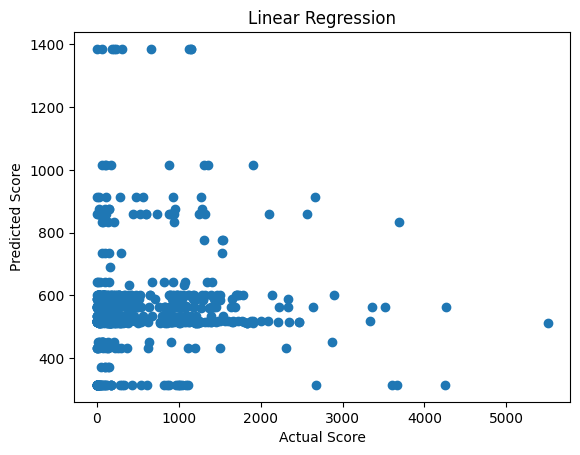

In [ ]:
# Creates a dataframe with the predicted scores and the actual scores

dfScore = pd.DataFrame({'Actual': y_test, 'Predicted': linRegPred})
dfScore

# Creates a scatterplot of the predicted scores and the actual scores

plt.scatter(y_test, linRegPred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression')
plt.show()

It could also be an idea to visualize the coeficients of the linear regression model. We will create a dataframe with the coeficients and the words. We can use this dataframe to evaluate the model. We will also create a barplot of the coeficients and the words. The higher the coeficient, the more important the word is for predicting the score.

In [ ]:
# Creates a dataframe with the coeficients and the words

#dfCoef = pd.DataFrame({'Coeficients': linReg.coef_, 'Words': X_train_vectorized})
#dfCoef

# Creates a barplot of the coeficients and the words

#plt.figure(figsize=(20, 10))
#plt.bar(dfCoef['Words'], dfCoef['Coeficients'])
#plt.xticks(rotation=90)
#plt.xlabel('Words')
#plt.ylabel('Coeficients')
#plt.title('Linear Regression')
#plt.show()

In [ ]:
# Creates a dictionary of hyperparameters for the k-nearest neighbors regression model

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'weights': ['uniform', 'distance'],
              #'algorithm': ['auto', 'ball_tree', 'kd_tree'],#, 'brute'],
              'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'p': [1, 2]}

# Creates a grid search object with the k-nearest neighbors regression model and the dictionary of hyperparameters

grid_search = GridSearchCV(knReg, param_grid, cv=5, return_train_score=True)

# Fits the grid search object to the training data

grid_search.fit(X_train_vectorized, y_train)

# Prints the best hyperparameters

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: -0.07667


In [ ]:
knReg = KNeighborsRegressor(leaf_size=10, n_neighbors=9, p=1, weights='uniform')
knReg.fit(X_train_vectorized,y_train)

knRegPred = knReg.predict(X_test_vectorized)

print("Training set score: {:.3f}".format(knReg.score(X_train_vectorized, y_train)))
print("Test score: {:.5f}".format(knReg.score(X_test_vectorized, y_test)))

Training set score: -0.027
Test score: -0.11466


Now lets visualize the results of the k-nearest neighbors regression model with the best hyperparameters. We will create a dataframe with the predicted scores and the actual scores. We can use this dataframe to evaluate the model. We will also create a scatterplot of the predicted scores and the actual scores. The closer the points are to the line, the more accurate the model is.

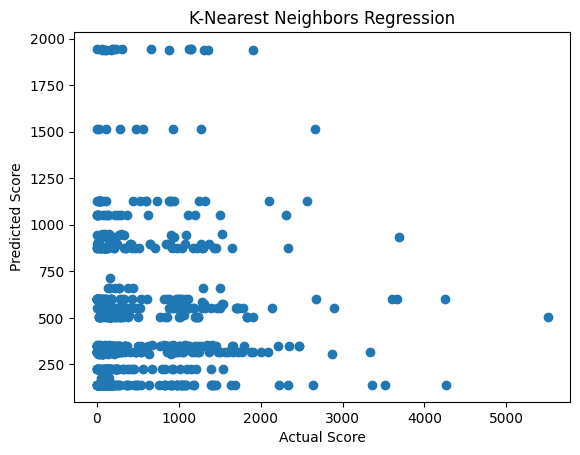

In [ ]:
# Creates a dataframe with the predicted scores and the actual scores

dfScore = pd.DataFrame({'Actual': y_test, 'Predicted': knRegPred})
dfScore

# Creates a scatterplot of the predicted scores and the actual scores

plt.scatter(y_test, knRegPred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('K-Nearest Neighbors Regression')
plt.show()

In [ ]:
# Creates a dictionary of hyperparameters for the random forest regression model

param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'criterion': ['mse', 'mae'],
              'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'max_features': ['auto', 'sqrt', 'log2']}

# Creates a grid search object with the random forest regression model and the dictionary of hyperparameters

grid_search = GridSearchCV(rfReg, param_grid, cv=5, return_train_score=True)

# Fits the grid search object to the training data

grid_search.fit(X_train_vectorized, y_train)

# Prints the best hyperparameters

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

ValueError: ignored

Lets visualize the results of the random forest regression model with the best hyperparameters. We will create a dataframe with the predicted scores and the actual scores. We can use this dataframe to evaluate the model. We will also create a scatterplot of the predicted scores and the actual scores. The closer the points are to the line, the more accurate the model is.

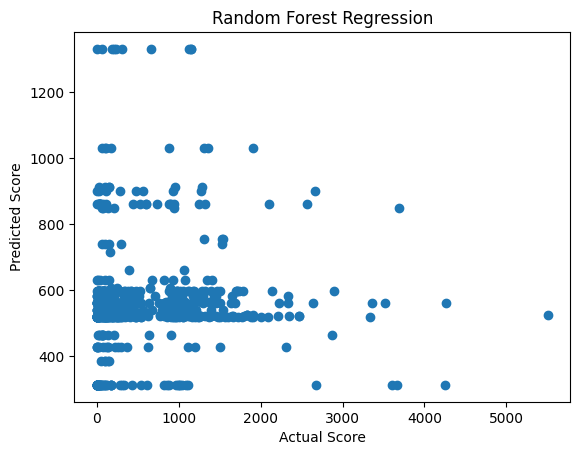

In [ ]:
# Creates a dataframe with the predicted scores and the actual scores

dfScore = pd.DataFrame({'Actual': y_test, 'Predicted': rfRegPred})
dfScore

# Creates a scatterplot of the predicted scores and the actual scores

plt.scatter(y_test, rfRegPred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Random Forest Regression')
plt.show()

Evaluating the regression models using MSE, MAE & RSME

In [ ]:
# Creates a dictionary of the regression models

models = {'Linear Regression': linReg,
          'K-Nearest Neighbors Regression': knReg,
          'Random Forest Regression': rfReg,
          #'Dummy Regression': dm,
          }

# Creates a dictionary of the predicted scores

preds = {'Linear Regression': linRegPred,
         'K-Nearest Neighbors Regression': knRegPred,
         'Random Forest Regression': rfRegPred,
         #'Dummey Regression': dm_y_pred,
         }

# Creates a dictionary of the MSE, MAE & RSME

mse = {}
mae = {}
rmse = {}

# Loops through the dictionary of regression models

for key, value in models.items():
    # Creates a dictionary of the MSE, MAE & RSME for each regression model
    mse[key] = mean_squared_error(y_test, preds[key])
    mae[key] = mean_absolute_error(y_test, preds[key])
    rmse[key] = np.sqrt(mean_squared_error(y_test, preds[key]))

# Creates a dataframe of the MSE, MAE & RSME for each regression model

dfScore = pd.DataFrame({'MSE': list(mse.values()), 'MAE': list(mae.values()), 'RMSE': list(rmse.values())}, index=list(mse.keys()))
dfScore

,MSE,MAE,RMSE
Linear Regression,482787.961343,524.864564,694.829448
K-Nearest Neighbors Regression,524868.076674,506.479912,724.477796
Random Forest Regression,482190.125170,524.617304,694.399111


In [ ]:
emotion_scores = df.groupby('emotion')['score'].mean()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(emotion_scores.index, emotion_scores.values)
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.title('Emotion-Score Relationship')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
